## <center>PyTorch Tutorial<center>

In [55]:
import numpy as np
from matplotlib import pyplot as plt 
np.random.seed(73)

## <center> Linear Regression with Numpy<center>

### Data Generation

In [56]:
# Data Generation
def generate_data(size = 100):

  x = np.random.rand(size, 1)
  y = 3 + 2.5 * x + .1 * np.random.randn(size, 1)

  # Shuffles the indices
  idx = np.arange(size)
  np.random.shuffle(idx)

  # split to train and validation 80:20
  split = int(size * 0.8)
  train_idx = idx[:split]
  val_idx = idx[split:]

  # Generate train and validation sets
  x_train, y_train = x[train_idx], y[train_idx]
  x_val, y_val = x[val_idx], y[val_idx]

  return x_train, y_train, x_val, y_val

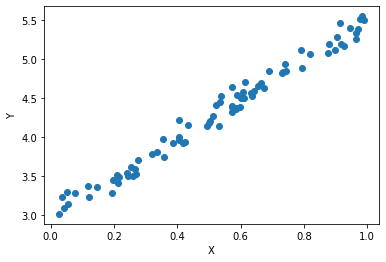

In [57]:
x_train, y_train, x_val, y_val = generate_data()
plt.scatter(x_train, y_train)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

## Gradient Descent

Gradient descent consist of 3 basic steps : 

1. **Compute the Loss**

$$ \hat{y} = a + bx + \epsilon $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)^2 $$

$$ \text{MSE} = \frac{1}{N} \sum_{i} (y_i - a - bx_i)^2 $$

2. **Compute the Gradients** : A gradient is a partial derivative. Using the chain rule the final expression came to be : 

$$\frac{\partial \text{MSE}}{\partial a} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial a} = -2 * \frac{1}{N} \sum_{i} (y_i - \hat{y}_i)$$

$$\frac{\partial \text{MSE}}{\partial b} = \frac{\partial \text{MSE}}{\partial \hat{y}} * \frac{\partial \hat{y}}{\partial b} = -2 * \frac{1}{N} \sum_{i} x_i(y_i - \hat{y}_i)$$

3. **Update the Parameters**

$$a = a - \alpha \frac{\partial \text{MSE}}{\partial a}$$

$$b = b - \alpha \frac{\partial \text{MSE}}{\partial b}$$

4. Repeat step 1 to 3 till convergence is reached

In [58]:
# Initializes parameters "a" and "b" randomly

a = np.random.randn(1)
b = np.random.randn(1)

print(f"Initial values of [a, b] : [{a[0]}, {b[0]}]")

learning_rate = 1e-1 #learning rate
n_epochs = 1000

for epoch in range(n_epochs):
  
  # Step 1: Computes y hat
  yhat = a + b * x_train
  
  # Compute error and Loss using MSE 
  error = (y_train - yhat)
  loss = (error ** 2).mean()
  
  # Step 2: Compute gradients for both "a" and "b" parameters (partial derivatives)
  a_grad = -2 * error.mean()
  b_grad = -2 * (x_train * error).mean()
  
  # Step 3: Update parameters using gradients and the learning rate
  a = a - learning_rate * a_grad
  b = b - learning_rate * b_grad
    
print(f"Final values of [a, b] : [{a[0]}, {b[0]}]")

Initial values of [a, b] : [-1.389528167189103, 1.2528595392468875]
Final values of [a, b] : [2.9818223574919154, 2.506904792435268]


## <center> PyTorch Basics<center>

### Tensors 

* How to create a Tensor
* Operations on tensors
* Data types for Tensors

### Create a Tensor 

1. Create tensors from Numpy then see what operations can be applied.
**Note:** By default a tensor resides in cpu but can be sent to the GPU for fatser computations

In [59]:
import torch

device = 'cuda' if torch.cuda.is_available() else 'cpu'

a = torch.randn(1)
b = torch.randn(1)

print(a, b)
print(type(a), type(b))
print(a.type(), b.type())

tensor([0.0104]) tensor([-0.4392])
<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.FloatTensor torch.FloatTensor


In [60]:
a = a.to(device)
b = b.to(device)

In [61]:
a.requires_grad_()
b.requires_grad_()

tensor([-0.4392], device='cuda:0', requires_grad=True)

In [62]:
print(type(a), type(b))
print(a.type(), b.type())

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.cuda.FloatTensor torch.cuda.FloatTensor


In [63]:
a = torch.randn(1)
b = torch.randn(1)
a.requires_grad_()
b.requires_grad_()
a = a.to(device)
b = b.to(device)
print(a, b)

tensor([-0.3340], device='cuda:0', grad_fn=<CopyBackwards>) tensor([0.1218], device='cuda:0', grad_fn=<CopyBackwards>)


In [64]:
a = torch.randn(1, device=device, requires_grad=True)
b = torch.randn(1, device=device, requires_grad=True)
print(a, b)

tensor([-0.4730], device='cuda:0', requires_grad=True) tensor([0.9873], device='cuda:0', requires_grad=True)


In [65]:
x_train_tensor = torch.from_numpy(x_train).to(device)
y_train_tensor = torch.from_numpy(y_train).to(device)

criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD([a,b], learning_rate)

for epoch in range(2):
  
  yhat = a+b*x_train_tensor

  error = (y_train_tensor - yhat)
  loss = (error ** 2).mean()

  loss = criterion(y_train_tensor, yhat)

  print(loss.item())

  loss.backward()
  optimizer.step()

  optimizer.zero_grad()
  #with torch.no_grad():
  # Step 3: Update parameters using gradients and the learning rate
    #a -= learning_rate * a.grad
    #b -= learning_rate * b.grad
    #a.grad.zero_()    
    #b.grad.zero_() 
  print(a, b)
   

18.276078850770325
tensor([0.3777], device='cuda:0', requires_grad=True) tensor([1.4574], device='cuda:0', requires_grad=True)
10.051153229358796
tensor([1.0088], device='cuda:0', requires_grad=True) tensor([1.8049], device='cuda:0', requires_grad=True)


In [66]:
model = torch.nn.Sequential(torch.nn.Linear(1,1)).float().to(device)

print(model.state_dict())
model.parameters

OrderedDict([('0.weight', tensor([[-0.8852]], device='cuda:0')), ('0.bias', tensor([0.8221], device='cuda:0'))])


<bound method Module.parameters of Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)>

In [67]:
x_train_tensor = x_train_tensor.to(torch.float32)
y_train_tensor = y_train_tensor.to(torch.float32)

In [68]:
criterion = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), learning_rate)

model.train()
for epoch in range(2):
  
  yhat = model(x_train_tensor)

  #error = (y_train_tensor - yhat)
  #loss = (error ** 2).mean()

  loss = criterion(y_train_tensor, yhat)

  print(loss.item())

  loss.backward()
  optimizer.step()

  optimizer.zero_grad()
  #with torch.no_grad():
  # Step 3: Update parameters using gradients and the learning rate
    #a -= learning_rate * a.grad
    #b -= learning_rate * b.grad
    #a.grad.zero_()    
    #b.grad.zero_() 

16.423391342163086
9.120979309082031


### Dynamic Computation Graph

* Easily visualize a graph using `PyTorchViz` package. 

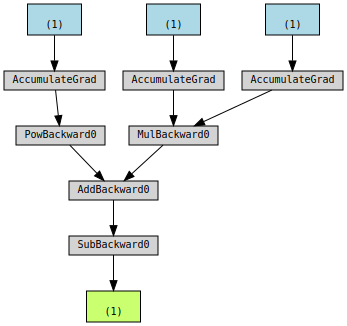

In [69]:
!pip install torchviz 
from torchviz import make_dot

a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)
c = torch.randn(1, requires_grad=True)

d = a**2 + b*c - 3

make_dot(d)

In [70]:
torch.save(model.state_dict(), "model.pt")

In [71]:
test_model = torch.nn.Sequential(torch.nn.Linear(1,1))
test_model.state_dict()

OrderedDict([('0.weight', tensor([[0.2223]])), ('0.bias', tensor([-0.5164]))])

In [72]:
test_model.load_state_dict(torch.load("model.pt"))
test_model.state_dict()

OrderedDict([('0.weight', tensor([[-0.0693]])), ('0.bias', tensor([2.1924]))])

### Autograd & Optimizers

### Model

### Model Training 